## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, regularizers, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer = regularizers)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer = regularizers)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REGULARIZER = ['L1', 'L2', 'L1_L2']
L1_EXP = [1e-4, 1e-8, 1e-12]


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.regularizers import l1, l2, l1_l2

for reg in REGULARIZER:
    for reg_ratio in L1_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"\nRegularizer = {reg}")
        print("Regularizer Ratio = %.12f" % (reg_ratio), "\n")
        
        # select different regularizers
        regularizer = {
            'L1': lambda: keras.regularizers.l1(reg_ratio),
            'L2': lambda: keras.regularizers.l2(reg_ratio),
            'L1_L2': lambda: keras.regularizers.l1_l2(l1 = reg_ratio, l2 = reg_ratio)
        }.get(reg)
        print(f"reg = {reg}")
        print(f"regularizer = {regularizer}")
        
        model = build_mlp(input_shape=x_train.shape[1:],
                          regularizers = regularizer())
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        
        model.fit(x_train, y_train,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-reg-%s-ratio-%s" % (str(reg), str(reg_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}



Regularizer = L1
Regularizer Ratio = 0.000100000000 

reg = L1
regularizer = <function <lambda> at 0x000001F2DFC14598>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_____________________________________________________________

Epoch 48/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.7017 - accuracy: 0.6319 - val_loss: 3.0790 - val_accuracy: 0.5060
Epoch 49/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.6639 - accuracy: 0.6305 - val_loss: 2.9208 - val_accuracy: 0.5385
Epoch 50/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.6288 - accuracy: 0.6340 - val_loss: 3.0166 - val_accuracy: 0.5141

Regularizer = L1
Regularizer Ratio = 0.000000010000 

reg = L1
regularizer = <function <lambda> at 0x000001F28119CF28>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (De

Epoch 45/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.9356 - accuracy: 0.6711 - val_loss: 1.3518 - val_accuracy: 0.5355
Epoch 46/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.9220 - accuracy: 0.6775 - val_loss: 1.3423 - val_accuracy: 0.5457
Epoch 47/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.9105 - accuracy: 0.6821 - val_loss: 1.3551 - val_accuracy: 0.5361
Epoch 48/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8986 - accuracy: 0.6838 - val_loss: 1.3541 - val_accuracy: 0.5420
Epoch 49/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.8926 - accuracy: 0.6850 - val_loss: 1.4512 - val_accuracy: 0.5180
Epoch 50/50
50000/50000 [==============================] - 11s 215us/step - loss: 0.8810 - accuracy: 0.6902 - val_loss: 1.3828 - val_accuracy: 0.5365

Regularizer = L1
Regularizer Ratio = 0.000000000001 

reg = L1
regularizer = <function <lambda> at 

Epoch 42/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.9679 - accuracy: 0.6586 - val_loss: 1.3508 - val_accuracy: 0.5322
Epoch 43/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.9582 - accuracy: 0.6620 - val_loss: 1.3912 - val_accuracy: 0.5254
Epoch 44/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.9471 - accuracy: 0.6680 - val_loss: 1.4147 - val_accuracy: 0.5259
Epoch 45/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.9343 - accuracy: 0.6685 - val_loss: 1.4651 - val_accuracy: 0.5103
Epoch 46/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.9225 - accuracy: 0.6733 - val_loss: 1.4126 - val_accuracy: 0.5184
Epoch 47/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.9129 - accuracy: 0.6773 - val_loss: 1.4441 - val_accuracy: 0.5146
Epoch 48/50
50000/50000 [==============================] - 10s 205us/step - loss: 0.8967 - accuracy:

Epoch 39/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.1514 - accuracy: 0.6445 - val_loss: 1.5213 - val_accuracy: 0.5219
Epoch 40/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1410 - accuracy: 0.6490 - val_loss: 1.5275 - val_accuracy: 0.5238
Epoch 41/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1297 - accuracy: 0.6501 - val_loss: 1.5529 - val_accuracy: 0.5173
Epoch 42/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1166 - accuracy: 0.6577 - val_loss: 1.5355 - val_accuracy: 0.5193
Epoch 43/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1019 - accuracy: 0.6624 - val_loss: 1.5047 - val_accuracy: 0.5314
Epoch 44/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.0921 - accuracy: 0.6654 - val_loss: 1.5397 - val_accuracy: 0.5213
Epoch 45/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.0770 - accuracy:

Epoch 36/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.0274 - accuracy: 0.6384 - val_loss: 1.4647 - val_accuracy: 0.4980
Epoch 37/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.0182 - accuracy: 0.6416 - val_loss: 1.4647 - val_accuracy: 0.4991
Epoch 38/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.0046 - accuracy: 0.6460 - val_loss: 1.4222 - val_accuracy: 0.5116
Epoch 39/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.9935 - accuracy: 0.6506 - val_loss: 1.3863 - val_accuracy: 0.5247
Epoch 40/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.9815 - accuracy: 0.6538 - val_loss: 1.3812 - val_accuracy: 0.5223
Epoch 41/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.9740 - accuracy: 0.6568 - val_loss: 1.4272 - val_accuracy: 0.5107
Epoch 42/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.9545 - accuracy:

Epoch 33/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.0882 - accuracy: 0.6170 - val_loss: 1.3439 - val_accuracy: 0.5227
Epoch 34/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.0742 - accuracy: 0.6236 - val_loss: 1.3292 - val_accuracy: 0.5292
Epoch 35/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.0618 - accuracy: 0.6275 - val_loss: 1.3520 - val_accuracy: 0.5292
Epoch 36/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.0495 - accuracy: 0.6346 - val_loss: 1.3382 - val_accuracy: 0.5280
Epoch 37/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.0325 - accuracy: 0.6377 - val_loss: 1.3516 - val_accuracy: 0.5284
Epoch 38/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.0247 - accuracy: 0.6419 - val_loss: 1.3516 - val_accuracy: 0.5284
Epoch 39/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.0102 - accuracy:

Epoch 30/50
50000/50000 [==============================] - 12s 246us/step - loss: 3.5480 - accuracy: 0.5829 - val_loss: 3.6926 - val_accuracy: 0.5237
Epoch 31/50
50000/50000 [==============================] - 12s 248us/step - loss: 3.4933 - accuracy: 0.5846 - val_loss: 3.6962 - val_accuracy: 0.5014
Epoch 32/50
50000/50000 [==============================] - 12s 250us/step - loss: 3.4370 - accuracy: 0.5851 - val_loss: 3.6031 - val_accuracy: 0.5199
Epoch 33/50
50000/50000 [==============================] - 13s 251us/step - loss: 3.3790 - accuracy: 0.5900 - val_loss: 3.5684 - val_accuracy: 0.5142
Epoch 34/50
50000/50000 [==============================] - 12s 244us/step - loss: 3.3304 - accuracy: 0.5909 - val_loss: 3.6066 - val_accuracy: 0.4762
Epoch 35/50
50000/50000 [==============================] - 12s 246us/step - loss: 3.2759 - accuracy: 0.5943 - val_loss: 3.4736 - val_accuracy: 0.5185
Epoch 36/50
50000/50000 [==============================] - 12s 247us/step - loss: 3.2241 - accuracy:

50000/50000 [==============================] - 12s 243us/step - loss: 1.1831 - accuracy: 0.5828 - val_loss: 1.4007 - val_accuracy: 0.5051
Epoch 27/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1720 - accuracy: 0.5867 - val_loss: 1.3487 - val_accuracy: 0.5232
Epoch 28/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.1589 - accuracy: 0.5900 - val_loss: 1.3659 - val_accuracy: 0.5165
Epoch 29/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.1444 - accuracy: 0.5981 - val_loss: 1.3572 - val_accuracy: 0.5234
Epoch 30/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1323 - accuracy: 0.6011 - val_loss: 1.3423 - val_accuracy: 0.5289
Epoch 31/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.1170 - accuracy: 0.6085 - val_loss: 1.3546 - val_accuracy: 0.5233
Epoch 32/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1058 - accuracy: 0.6113 - va

50000/50000 [==============================] - 12s 241us/step - loss: 1.2399 - accuracy: 0.5644 - val_loss: 1.3753 - val_accuracy: 0.5112
Epoch 23/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.2262 - accuracy: 0.5675 - val_loss: 1.3594 - val_accuracy: 0.5229
Epoch 24/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.2126 - accuracy: 0.5732 - val_loss: 1.3587 - val_accuracy: 0.5204
Epoch 25/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.1981 - accuracy: 0.5779 - val_loss: 1.3850 - val_accuracy: 0.5145
Epoch 26/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.1865 - accuracy: 0.5820 - val_loss: 1.3735 - val_accuracy: 0.5131
Epoch 27/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.1707 - accuracy: 0.5884 - val_loss: 1.3435 - val_accuracy: 0.5267
Epoch 28/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.1558 - accuracy: 0.5922 - va

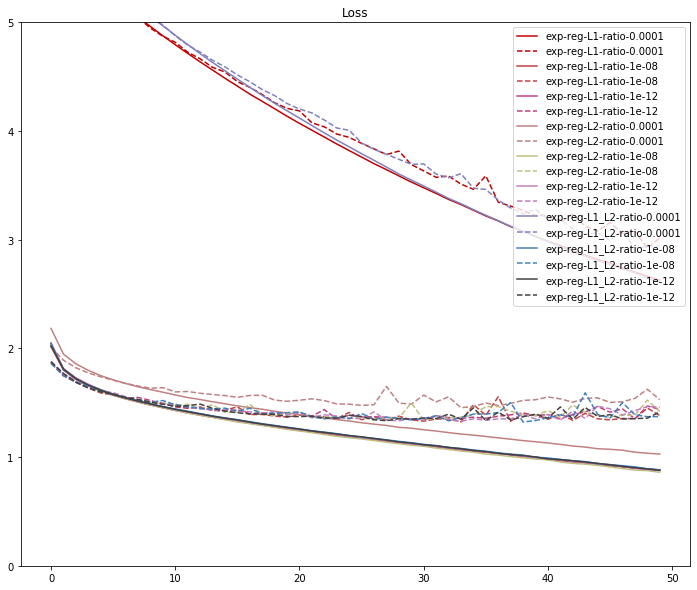

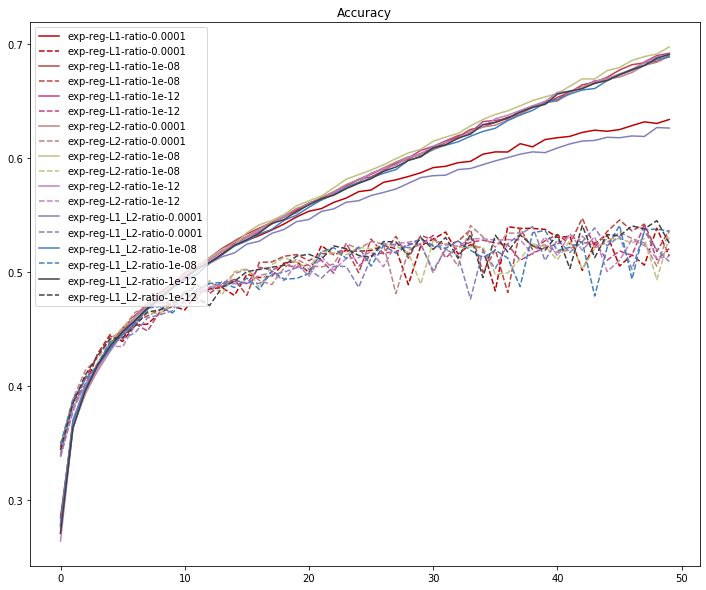

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["#c00000", "#c04040", "#c04080", "#c08080",
             "#c0c080", "#c080c0", "#8080c0", "#4080c0",
            "#404040"]

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc = 'upper right')
plt.show()

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc = 'upper left')
plt.show()